In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt


import matplotlib.mlab as mlab
from microphone import record_audio
sampling_rate = 44100

from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion 
from scipy.ndimage.morphology import iterate_structure

In [66]:


def audio_to_spectrogram(audio):
    
    """
    Parameters: audio
        The digitized audio file at a sampling rate of 44100 Hz
    -------
    Returns: 
    
    specgram: a (M, N) numPy array. 
        N corresponds to a slice of time; M represents a specific frequency.
        
    freqs : array_like
        1-D array, frequencies corresponding to the rows in *spectrum*.
    
    times : array_like
        1-D array, the times corresponding to midpoints of segments
        (i.e the columns in *spectrum*).
    
    """
    specgram, freqs, times = mlab.specgram(audio, NFFT=4096, Fs=sampling_rate, noverlap=int(4096 / 2))
    
    return specgram.T, freqs, times
    

In [67]:
with open("trumpet.txt", 'r') as R:
    
    trumpet_audio = np.asarray([int(i) for i in R])
    
audio_to_spectrogram(trumpet_audio)[0].shape
    

(47, 2049)

In [68]:
def spectrogram_to_peaks(specgram, freqs, times):
    """
    Parameters: 
    
    specgram
        The M X N numpy array where axis zero corresponds to times while axis one corresponds to C_k. 
        
    freqs
        Array of frequencies. 
    
    times
        Array of times where each time value corresponds to the middle of the time bin.
        
    -----
    
    Returns:
        
    peaks
        A M X N numpy array where the C_k values below the 90th percentile 
    
    
        
    """
    fp = generate_binary_structure(2,1)
    fp = iterate_structure(fp, 20)
    
    background_threshold = find_ninety_C_k(specgram)
    
    peaks = ((specgram == maximum_filter(specgram, footprint = fp) ) & (specgram > background_threshold))
    
    return peaks
    
    

In [69]:
def find_ninety_C_k(spec_gram):
    """
    Parameters:
    
    specgram
        The M X N numpy array where axis zero corresponds to times while axis one corresponds to C_k.
    
    -----
    
    Returns:
        
    ninety_C_k_value
        The 90th percentile C_k value in the flattened spectrogram, for filtering purposes.
    """
    spec_gram = spec_gram[spec_gram != 0]
    specgram_flattened = spec_gram.flatten()
    specgram_sorted = np.sort(np.log(np.abs(specgram_flattened)))
    specgram_length = len(specgram_sorted)
   
    ninety_index = int(0.9 * specgram_length)
   
    ninety_C_k = specgram_sorted[ninety_index]
    
    return ninety_C_k
    

In [70]:
peaks_array


array([[False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [71]:
peaks_array = spectrogram_to_peaks(*audio_to_spectrogram(trumpet_audio))
peaks_where = np.where(peaks_array)
x = peaks_where[0]
y = peaks_where[1]

In [72]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


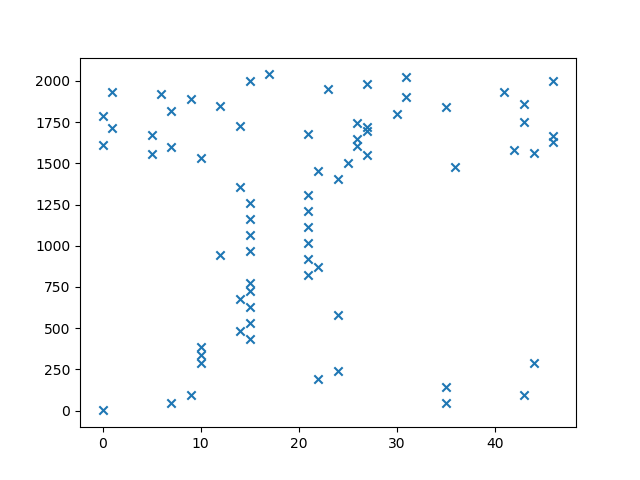

In [73]:
fig, axs = plt.subplots()
axs.scatter(x, y, marker='x')